# Animations

So far this is the best, definitely better than using ipywidgets since it still flashes.  Hope this gets fixed soon.  (it eventually did, see other notebooks in this folder).

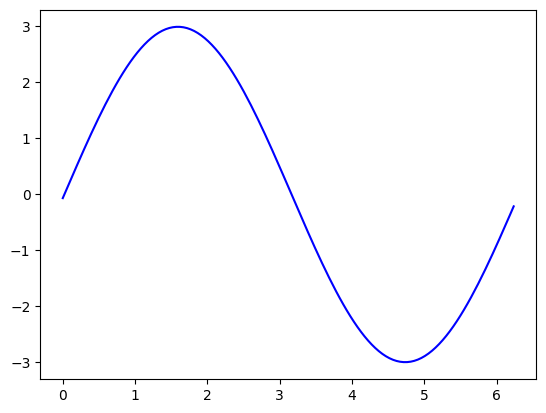

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

fig, axes = plt.subplots(1)
camera = Camera(fig)
fps = 32
secs = 3
N = fps * secs
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in range(N):
    axes.plot(t, 2*np.sin(t + 2*np.pi/N * i) + np.sin(t - 2*np.pi/N * i), color='blue')
#     axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
animation = camera.animate(blit=True);
animation.save('animation.mp4', fps=fps, dpi=300)

In [41]:
from IPython.display import HTML

HTML("""
<video controls id="theVideo2">
        <source src="animation.mp4">
</video>

<script>
video2 = document.getElementById("theVideo2")
video2.width = 800;
video2.playbackRate = 1;
video2.loop = true;
</script>
""")




## Adding capabilites with HTML and Javascript

In [46]:
HTML("""
<video controls id="theVideo3">
        <source src="animation.mp4">
</video>

<button id = "playButton"> Play </button>

<button id = "pauseButton"> Pause </button>


<script>
 
video3 = document.getElementById("theVideo3")
video3.width = 800;
video3.playbackRate = 1;
video3.loop = true;

var playBtn = document.getElementById ("playButton");
var pauseBtn = document.getElementById ("pauseButton");

playButton.onclick = function () {

video3.play ();

}


pauseButton.onclick = function () {

video3.pause ();

}
</script>

""")




In [47]:
HTML("""
    <script type="text/javascript" src="VideoFrame.min.js"></script>

    <video id="video_1" class="video" controls class="video" width="800" height="600" mediagroup="videoMG1" autobuffer preload>
            <source src="animation.mp4"  />
        </video>
    <div id="videoControls">
      <button type="button" id="playPause">&#9205;</button>
      <button type="button" id="mute">&#128266;</button>
      <input type="range" id="volumeBar" min="0" max="1" step="0.1" value="1">
    </div>
    <script>
      var video = document.getElementById("video_1");
      var video2 = VideoFrame({
        id: 'video_1',
        frameRate: 32.00,
        callback: function(response) {
          console.log(response);
        }
      });
      video.controls = false;
      video.addEventListener("keydown", function(e) {
        console.log("asd", e.keyCode)
        if (e.keyCode == 39) {
          console.log("backward")
          video2.seekBackward(1)
        } else if (e.KeyCode == 37) {
          console.log("forwrd")
          video2.seekForward(1)
        }
        return false;
      });

      document.getElementById("playPause").addEventListener("click", function() {
        if (video.paused == true) {
          video.play();
          this.innerHTML = "&#9208;";
        } else {
          video.pause();
          this.innerHTML = "&#9205;";
        }
      });

      document.getElementById("mute").addEventListener("click", function() {
        if (video.muted == false) {
          video.muted = true;
          this.innerHTML = "&#128263;";
        } else {
          video.muted = false;
          this.innerHTML = "&#128266;";
        }
      });

      document.getElementById("volumeBar").addEventListener("input", function() {
        video.volume = volumeBar.value;
      });

    </script>

""")



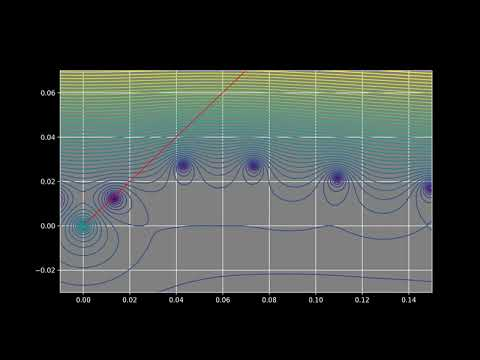

In [64]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('v0lp1wgIyNY', width=1024, height=700)



# Three Dimensional Animation?

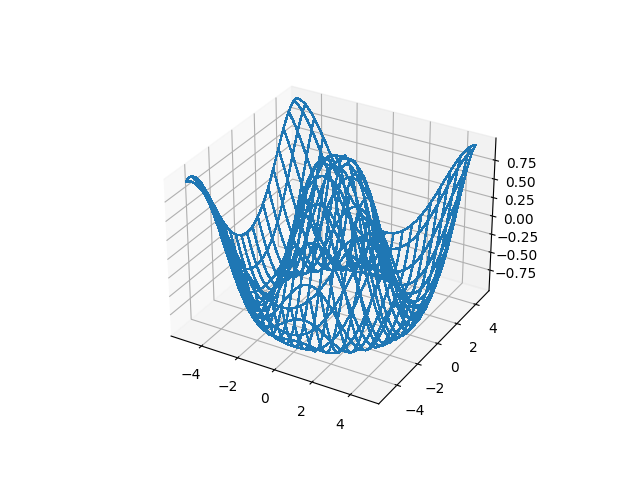

In [62]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from celluloid import Camera

plt.close('all')
%matplotlib widget
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
camera = Camera(fig)

# ax.grid(False)
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)

fps = 32
secs = 2
N = fps * secs

# for i in range(N):
    # Plot the surface.
Z = np.sin(R + 2*np.pi/N * i)
surf = ax.plot_wireframe(X, Y, Z, cmap=cm.coolwarm, rstride=2, cstride=2,
                       linewidth=1, antialiased=False)
    # camera.snap()
    
# animation = camera.animate(blit=True);
# ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,.5)
# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

In [13]:
animation.save('3d.mp4', fps=fps)

In [14]:
from IPython.display import Video

Video("3d.mp4", html_attributes="controls loop")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax2 = plt.subplots(1)

# Make data.
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + Y) + np.sin(X-Y)

CS = ax2.contour(X, Y, Z, levels=4)


In [ ]:
plt.axvline?

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera
fig1, ax2 = plt.subplots(1)
camera = Camera(fig1)

# Make data.
X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)

fps = 32
secs = 4
N = fps * secs

for i in range(N):
    # Plot the surface.
    Z = np.sin(X + Y + 2*np.pi/N * i) + np.sin(X - Y + 2*np.pi/N * i)
    ax2.contourf(X, Y, Z)

    camera.snap()

In [ ]:
animation = camera.animate(blit=True);

In [ ]:
animation.save('2dcontour.mp4', fps=fps)

In [ ]:
from IPython.display import Video

Video("2dcontour.mp4", html_attributes="controls loop")


interactive(children=(Play(value=0, description='t', max=15), Output()), _dom_classes=('widget-interact',))